In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [292]:
# Import data already with datetime class 
df = pd.read_csv("final_with_states.csv", parse_dates = ['date'])

# each day with no tume for better grouping
df['date_day'] = pd.to_datetime(df['date']).dt.date

# day of the week related to day included (e.g. Monday)
df['day_of_week'] = df['date'].dt.day_name()

# dateday as string to better work with it
df['date_day_string'] = df['date_day'].astype(str)

# Which week
df['date_week'] = df['date'].dt.strftime('%Y-%U')

# Which month
df['date_month'] = df['date'].dt.strftime('%Y-%m')

In [293]:
df
# df.shape
# df.dtypes

,valid_id,date,full_name,country,lon,lat,followers,retweets,replies,likes,...,coordinates,name,admin1,admin2,score,date_day,day_of_week,date_day_string,date_week,date_month
0,1249933360375480320,2020-04-14 05:31:50+00:00,"Zürich, Schweiz",CH,8.531600,47.384600,6462,0,0,1,...,"(47.3846, 8.5316)",Zuerich (Kreis 5) / Gewerbeschule,Zurich,Bezirk Zuerich,-0.050000,2020-04-14,Tuesday,2020-04-14,2020-15,2020-04
1,1249934504543870978,2020-04-14 05:36:23+00:00,"Ibadan, Nigeria",NG,3.916700,7.396400,593,0,0,0,...,"(7.3964, 3.9167)",Ibadan,Oyo,NaN,0.000000,2020-04-14,Tuesday,2020-04-14,2020-15,2020-04
2,1249936139911192576,2020-04-14 05:42:53+00:00,"Jaipur, India",IN,75.816700,26.916700,691,0,0,1,...,"(26.9167, 75.8167)",Jaipur,Rajasthan,Jaipur,0.100000,2020-04-14,Tuesday,2020-04-14,2020-15,2020-04
3,1249937561083990016,2020-04-14 05:48:31+00:00,"हिसार, भारत",IN,75.729194,29.143703,133,0,0,0,...,"(29.1437033, 75.7291944)",Hisar,Haryana,Hisar,-0.300000,2020-04-14,Tuesday,2020-04-14,2020-15,2020-04
4,1249938467661938688,2020-04-14 05:52:08+00:00,"Colina, Chile",CL,-70.655763,-33.181437,53,0,0,0,...,"(-33.18143675, -70.65576307)",Chicureo Abajo,Santiago Metropolitan,Provincia de Chacabuco,0.600000,2020-04-14,Tuesday,2020-04-14,2020-15,2020-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392607,1462570347790802951,2021-11-21 23:55:18+00:00,"Corvallis, OR",US,-123.264417,44.587813,268,0,0,0,...,"(44.58781347, -123.26441691)",Corvallis,Oregon,Benton County,0.400000,2021-11-21,Sunday,2021-11-21,2021-47,2021-11
392608,1462585007503855621,2021-11-22 00:53:33+00:00,"Varennes, Québec",CA,-73.479357,45.667751,1576,0,0,0,...,"(45.6677507, -73.47935661)",Montreal-Est,Quebec,NaN,0.156818,2021-11-22,Monday,2021-11-22,2021-47,2021-11
392609,1462592006216159234,2021-11-22 01:21:22+00:00,"Ashland, VA",US,-77.468255,37.754710,626,0,0,0,...,"(37.75470973, -77.46825546)",Ashland,Virginia,Hanover County,0.000000,2021-11-22,Monday,2021-11-22,2021-47,2021-11
392610,1462594688989507584,2021-11-22 01:32:02+00:00,"Kentucky, USA",US,-84.484544,38.092900,89,0,0,0,...,"(38.09289955, -84.48454382)",Lexington-Fayette,Kentucky,Fayette County,1.000000,2021-11-22,Monday,2021-11-22,2021-47,2021-11


In [106]:
# Some date info
print('most recent date:', df['date'].max())
print('less recent date:', df['date'].min())
print('time span of the dataset:', df['date'].max() - df['date'].min())

most recent date: 2021-12-01 04:07:58+00:00
less recent date: 2020-03-19 19:53:17+00:00
time span of the dataset: 621 days 08:14:41


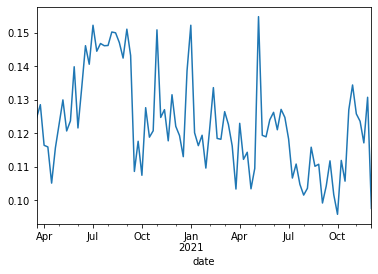

In [284]:
# Global mean sentiment by week


import matplotlib
%matplotlib inline

df2 = df.set_index('date')
df2 = df2['score'].resample('W').mean() # change 'W' to 'M' to see monthly chenges

df2.plot()

In [247]:
# Filter by date and country
# The idea is to inspect for each country the sentiment score over time but I don't know how to plot it
df1 = df.groupby(['country', 'date_day'])['score'].mean()

# date_day is a string now, if you want the datetime type you have to work with 'date'

In [248]:
df1

country  date_day  
AD       2020-05-16    0.000000
         2020-05-22    0.000000
         2020-05-24    0.000000
         2020-07-22    0.333333
         2020-09-07    0.231818
                         ...   
ZW       2021-08-14    0.500000
         2021-08-19    0.000000
         2021-09-07    0.300000
         2021-09-29    0.000000
         2021-11-19    0.500000
Name: score, Length: 26675, dtype: float64

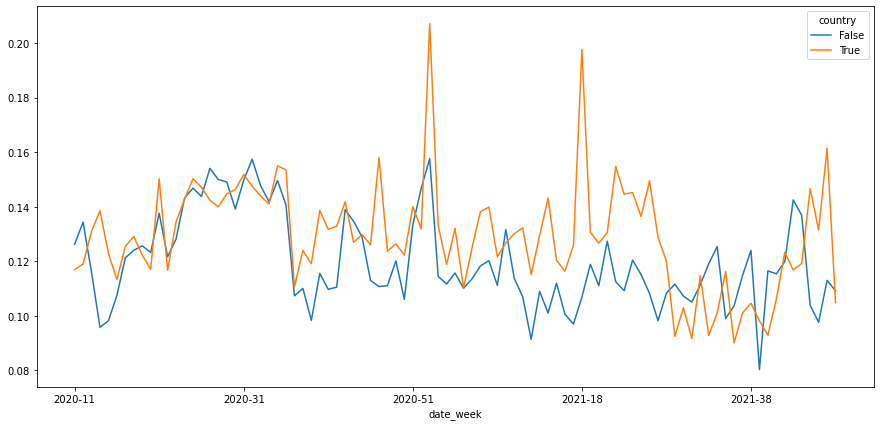

In [294]:
# US vs rest of the world on weekly basis

fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['date_week', df['country'] == 'US'])['score'].mean().unstack().plot(ax=ax)

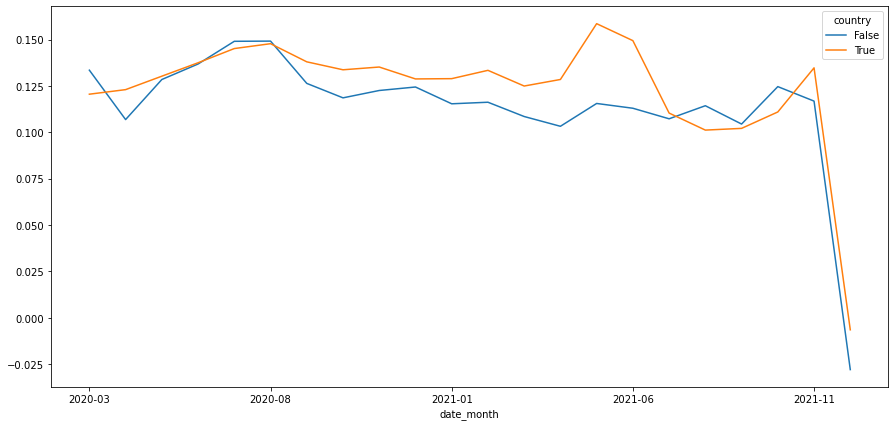

In [291]:
# US vs rest of the world on monthly basis

fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['date_month', df['country'] == 'US'])['score'].mean().unstack().plot(ax=ax)

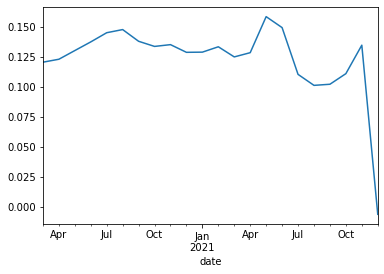

In [281]:
# Sentiment score monthly basis in the US

dfilt = df[df['country'] == 'US']
df_US = dfilt.set_index('date')
df_US = df_US['score'].resample('M').mean()

df_US.plot()

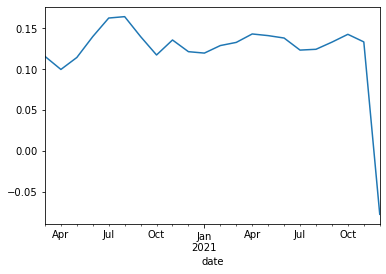

In [280]:
# Sentiment score monthly basis in the UK

dfilt = df[df['country'] == 'GB']
df_GB = dfilt.set_index('date')
df_GB = df_GB['score'].resample('M').mean()

df_GB.plot()